In [339]:
import pymysql
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,5]
import seaborn as sns
%matplotlib inline

In [340]:
conn=pymysql.connect(host='localhost',port=int(3306),user='root',passwd='123456789',db='employees')

In [341]:
df1=pd.read_sql_query("""
SELECT 
    YEAR(s.from_date) AS calendar_year,
    d.dept_name,
    e.gender,
    ROUND(AVG(s.salary), 0) AS average_salary
FROM
    salaries s
        JOIN
    employees e ON e.emp_no = s.emp_no
        JOIN
    dept_emp de ON e.emp_no = de.emp_no
        JOIN
    departments d ON de.dept_no = d.dept_no
GROUP BY 1 , 2
HAVING calendar_year <=2002; 
"""
,conn)

df1

,calendar_year,dept_name,gender,average_salary
0,1990,Customer Service,F,52477.0
1,1991,Customer Service,F,53362.0
2,1992,Customer Service,F,54433.0
3,1993,Customer Service,F,55642.0
4,1994,Customer Service,F,56575.0
...,...,...,...,...
157,1994,Sales,F,78599.0
158,1987,Sales,M,72055.0
159,1988,Sales,M,72993.0
160,1986,Sales,F,71480.0


Text(0.5, 1.0, 'Average Salary per Department by Gender')

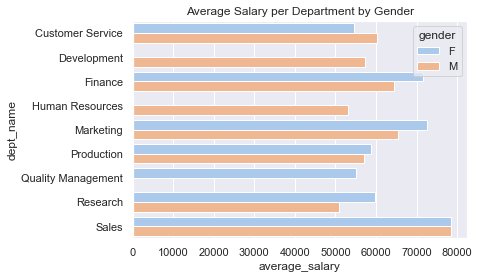

In [342]:
sns.barplot(data=df1, x='average_salary', y='dept_name', hue='gender', palette='pastel', ci = None, orient = 'h').set_title('Average Salary per Department by Gender')

Text(0.5, 1.0, 'Salary Trend by Gender')

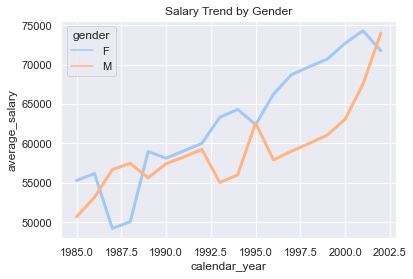

In [343]:
sns.lineplot(data=df1, x='calendar_year', y='average_salary', hue='gender', palette='pastel', ci = None, linewidth=3).set_title('Salary Trend by Gender')

In [344]:
df2=pd.read_sql_query("""
SELECT 
    d.dept_name, e.gender, COUNT(e.emp_no) AS no_of_employees
FROM
    employees e
        LEFT JOIN
    dept_emp de ON e.emp_no = de.emp_no
        JOIN
    departments d ON de.dept_no = d.dept_no
    
GROUP BY 1 , 2; 
"""
,conn)

df2

,dept_name,gender,no_of_employees
0,Customer Service,F,9448
1,Customer Service,M,14132
2,Development,M,51449
3,Development,F,34258
4,Finance,F,7015
5,Finance,M,10331
6,Human Resources,M,10711
7,Human Resources,F,7075
8,Marketing,F,8037
9,Marketing,M,12174


Text(0.5, 1.0, 'No. of Employees per Department by Gender')

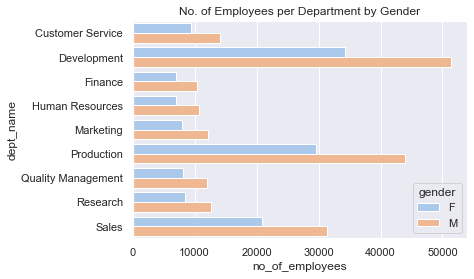

In [345]:
sns.barplot(data=df2, x='no_of_employees', y='dept_name', hue='gender', palette='pastel', ci = None, orient = 'h').set_title('No. of Employees per Department by Gender')

In [346]:
df3=pd.read_sql_query("""
SELECT 
    e.gender, COUNT(e.gender) AS no_of_managers
FROM
    employees e
        JOIN
    titles t ON e.emp_no = t.emp_no
WHERE
    t.title = 'manager'
GROUP BY 1;
"""
,conn)

df3

,gender,no_of_managers
0,M,11
1,F,13


In [347]:
df3.set_index('gender', inplace=True)
df3

,no_of_managers
gender,
M,11
F,13


Text(0.5, 1.0, 'No. of Male and Female Managers')

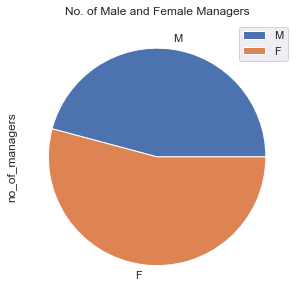

In [348]:
df3.plot.pie(y='no_of_managers', figsize=(5, 5)).set_title('No. of Male and Female Managers')

In [349]:
df4=pd.read_sql_query("""
SELECT DISTINCT
    d.dept_name, COUNT(e.emp_no) AS no_of_employees
FROM
    employees e
        LEFT JOIN
    dept_emp de ON e.emp_no = de.emp_no
        JOIN
    departments d ON de.dept_no = d.dept_no
GROUP BY 1;
"""
,conn)

df4

,dept_name,no_of_employees
0,Customer Service,23580
1,Development,85707
2,Finance,17346
3,Human Resources,17786
4,Marketing,20211
5,Production,73485
6,Quality Management,20117
7,Research,21126
8,Sales,52245


Text(0.5, 1.0, 'No. of Employees per Department')

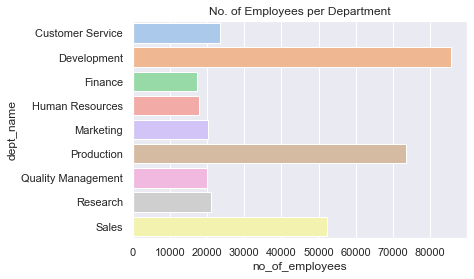

In [350]:
sns.barplot(data=df4, x='no_of_employees', y='dept_name', palette='pastel', ci = None, orient = 'h').set_title('No. of Employees per Department')

In [351]:
df5=pd.read_sql_query("""
SELECT 
    d.dept_name,
    t.title,
    COUNT(DISTINCT t.emp_no) AS no_of_managers,
    ROUND(AVG(s.salary), 0) AS average_salary
FROM
    titles t
        JOIN
    employees e ON t.emp_no = e.emp_no
        JOIN
    salaries s ON t.emp_no = s.emp_no
        JOIN
    dept_emp de ON t.emp_no = de.emp_no
        JOIN
    departments d ON de.dept_no = d.dept_no
WHERE
    t.title = 'Manager'
GROUP BY 1 , 2;
"""
,conn)

df5

,dept_name,title,no_of_managers,average_salary
0,Customer Service,Manager,4,54960.0
1,Development,Manager,2,59658.0
2,Finance,Manager,2,70816.0
3,Human Resources,Manager,2,58286.0
4,Marketing,Manager,2,88372.0
5,Production,Manager,4,56233.0
6,Quality Management,Manager,4,67131.0
7,Research,Manager,2,77535.0
8,Sales,Manager,2,85739.0


Text(0.5, 1.0, "Managers' Average Salary by Department")

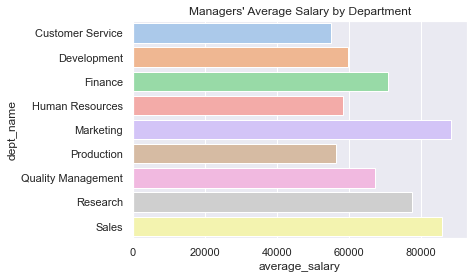

In [352]:
sns.barplot(data=df5, x='average_salary', y='dept_name', palette='pastel', ci = None, orient = 'h').set_title('Managers\' Average Salary by Department')

In [353]:
df6=pd.read_sql_query("""
SELECT 
    s.salary_group, COUNT(*) AS count
FROM
    (SELECT 
        CASE
                WHEN salary < 50000 THEN '< 50,000'
                WHEN salary BETWEEN 50000 AND 70000 THEN '50,000 to 70,000'
                WHEN salary BETWEEN 70000 AND 90000 THEN '70,000 to 90,000'
                WHEN salary BETWEEN 90000 AND 110000 THEN '90,000 to 110,000'
                ELSE 'more than 110,000'
            END AS salary_group
    FROM
        salaries) s
GROUP BY s.salary_group
order by s.salary_group;
"""
,conn)

df6

,salary_group,count
0,"50,000 to 70,000",427970
1,"70,000 to 90,000",228001
2,"90,000 to 110,000",68469
3,"< 50,000",231911
4,"more than 110,000",10979


Text(0.5, 1.0, 'Salaries Distribution')

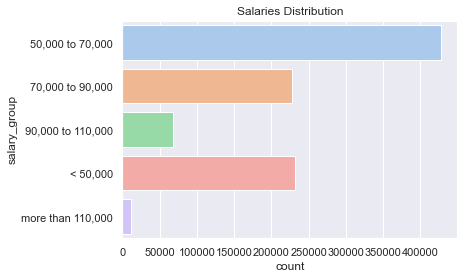

In [354]:
sns.barplot(data=df6, x='count', y='salary_group', palette='pastel', ci = None, orient = 'h').set_title('Salaries Distribution')

In [355]:
df7=pd.read_sql_query("""
SELECT 
    d.dept_name,
    t.title,
    MAX(s.salary) AS max_salary,
    MIN(s.salary) AS min_salary,
    (MAX(s.salary) - MIN(s.salary)) AS difference
FROM
    employees e
        JOIN
    titles t ON e.emp_no = t.emp_no
        JOIN
    salaries s ON e.emp_no = s.emp_no
        JOIN
    dept_manager dm ON e.emp_no = dm.emp_no
        JOIN
    departments d ON dm.dept_no = d.dept_no
GROUP BY 1,2
ORDER BY 2 DESC;
"""
,conn)

df7

,dept_name,title,max_salary,min_salary,difference
0,Development,Technique Leader,74510,40000,34510
1,Production,Technique Leader,75121,40000,35121
2,Quality Management,Technique Leader,93193,40055,53138
3,Customer Service,Staff,73953,40000,33953
4,Human Resources,Staff,79229,48291,30938
5,Research,Staff,103244,72446,30798
6,Sales,Staff,101987,70787,31200
7,Customer Service,Senior Staff,71406,40000,31406
8,Finance,Senior Staff,88443,52070,36373
9,Human Resources,Senior Staff,65400,40000,25400


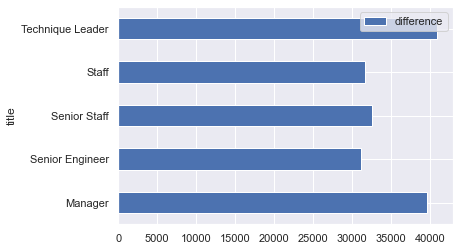

In [367]:
mean_diff = df7.groupby('title').mean()['difference'].round(2)
mean_diff.to_frame().plot.barh().legend(loc='best')

<AxesSubplot:ylabel='dept_name'>

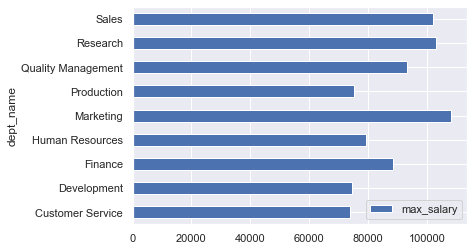

In [361]:
max = df7.groupby('dept_name').max()['max_salary'].round(2)
max.to_frame().plot.barh()

<AxesSubplot:ylabel='dept_name'>

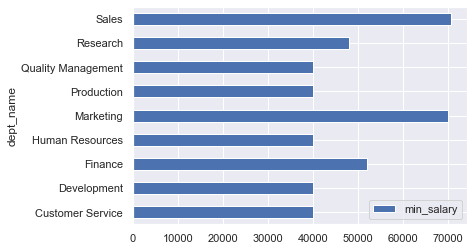

In [360]:
min = df7.groupby('dept_name').min()['min_salary'].round(2)
min.to_frame().plot.barh()

Text(0.5, 1.0, 'Salary Difference by Title')

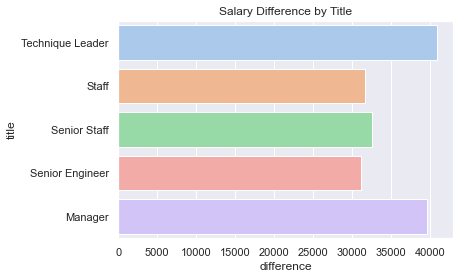

In [359]:
sns.barplot(data=df7, x='difference', y='title', palette='pastel', ci = None, orient = 'h').set_title('Salary Difference by Title')